In [1]:
# optional but useful for debugging - reimports modules after editing and saving .py files
%load_ext autoreload
%autoreload 2

%config Completer.use_jedi = False

In [2]:
import numpy as np, h5py, scipy
from scipy import stats, special, linalg, optimize

In [25]:
import matplotlib.pyplot as plt, matplotlib
from pylab import cm

# Plotting modules
import matplotlib
from pylab import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, ListedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=24)
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
plt.rc('legend',fontsize=24)
plt.rc('font',size=24)

# Gums data

In [4]:
gums={}
with h5py.File('/data/asfe2/Projects/binaries/GCNS_mock/gums_sample_reparameterised_200pc.h', 'r') as hf:
    for key in hf.keys():
        gums[key] = hf[key][...]        

# Fits to data

In [5]:
fits={}
with h5py.File('/data/asfe2/Projects/binaries/GCNS_mock/gums_fits_dr2&3_200pc.h', 'r') as hf:
    for key in hf.keys():
        fits[key] = hf[key][...]

## Crossmatch

In [7]:
intersection = np.intersect1d(fits['system_id'], gums['system_id'], return_indices=True)

fits['phot_g_mean_mag'] = np.zeros(len(fits['system_id']), dtype=bool) + np.nan
fits['phot_g_mean_mag'][intersection[1]] = gums['phot_g_mean_mag'][intersection[2]]

In [8]:
np.sum(np.isnan(fits['ra_edr3']))

86

In [9]:
# A small number of sources don't get a successful astrometry fit in the pipeline for some reason.
np.sum(np.isnan(fits['ra_edr3'])), np.sum(np.isnan(fits['ra_dr2'])), np.sum(np.isnan(fits['ra_dr2']) & np.isnan(fits['ra_edr3']))

(86, 60, 59)

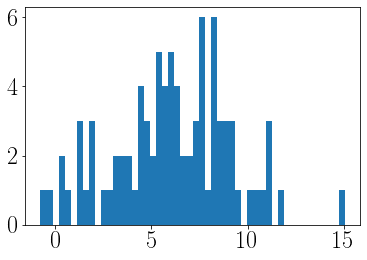

In [10]:
plt.hist(fits['phot_g_mean_mag'][np.isnan(fits['ra_edr3'])], bins=50);

# Comparing Astrometry Filters

In [11]:
# Plot colours
c_sin = cm.PRGn(0.8)
c_bin = cm.PRGn(0.2)

/home/andy/py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt


(-338725.78229854046, 7113241.428269349)


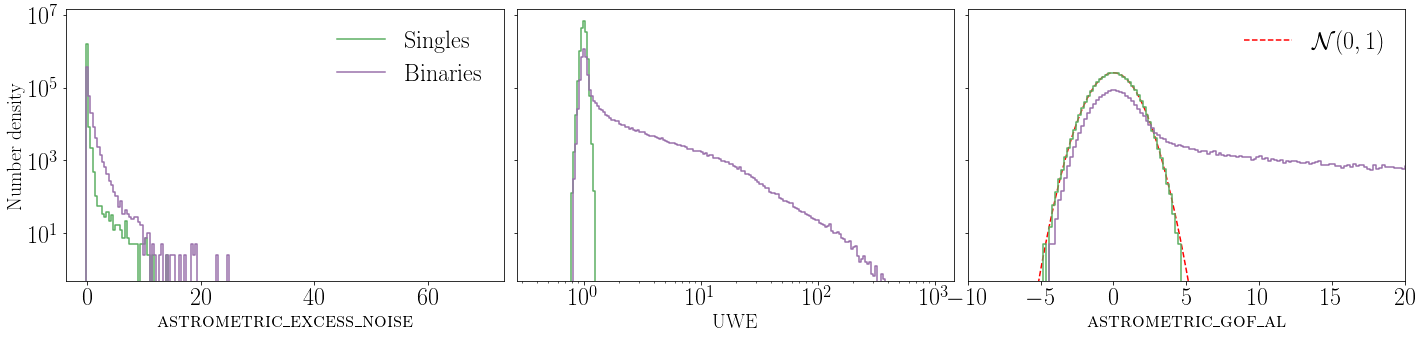

In [13]:
fits['system_id'], gums['binary'][intersection[2]]

fig, axes = plt.subplots(1,3,figsize=(24,5), sharey=True)


plt.sca(axes[0])
bins = np.arange(-0.2,70,0.4)

#hist = np.histogram(fits['UWE'][~gums['binary'][intersection[2]]], bins=bins)[0]
hist = np.histogram(fits['astrometric_excess_noise_edr3'][~fits['binary']], bins=bins)[0]
x = np.repeat(bins,2)
y = np.insert(np.repeat(hist/(bins[1:]-bins[:-1]),2), (0,2*len(hist)), (0,0))
plt.plot(x,y,label='Singles',c=c_sin)

hist = np.histogram(fits['astrometric_excess_noise_edr3'][fits['binary']&(fits['component']==b'unresolved')], bins=bins)[0]
x = np.repeat(bins,2)
y = np.insert(np.repeat(hist/(bins[1:]-bins[:-1]),2), (0,2*len(hist)), (0,0))
plt.plot(x,y,label='Binaries',c=c_bin)

plt.legend(frameon=False)
#plt.xscale('log')

plt.xlabel(r'\textsc{astrometric\_excess\_noise}', fontsize=20); plt.ylabel(r'Number density', fontsize=20)


plt.sca(axes[1])
bins = np.logspace(np.nanmin(np.log10(fits['UWE_edr3']/2)), 3, 200)

#hist = np.histogram(fits['UWE'][~gums['binary'][intersection[2]]], bins=bins)[0]
hist = np.histogram(fits['UWE_edr3'][~fits['binary']], bins=bins)[0]
x = np.repeat(bins,2)
y = np.insert(np.repeat(hist/(bins[1:]-bins[:-1]),2), (0,2*len(hist)), (0,0))
plt.plot(x,y,label='Singles',c=c_sin)

hist = np.histogram(fits['UWE_edr3'][fits['binary']&(fits['component']==b'unresolved')], bins=bins)[0]
x = np.repeat(bins,2)
y = np.insert(np.repeat(hist/(bins[1:]-bins[:-1]),2), (0,2*len(hist)), (0,0))
plt.plot(x,y,label='Binaries',c=c_bin)
plt.xscale('log')

plt.xlabel(r'$\mathrm{UWE}$', fontsize=20);


plt.sca(axes[2])
dof = fits['astrometric_n_good_obs_al_edr3'] - 5
fits['astrometric_gof_al'] = np.sqrt(9*dof/2) * (fits['UWE_edr3']**(2/3) + 2/(9*dof) - 1)

# bins = np.linspace(np.nanmin(fits['astrometric_gof_al']-1), np.nanmax(fits['astrometric_gof_al']/2)+1, 200)
bins = np.arange(-20,100, 0.2)

#hist = np.histogram(fits['UWE'][~gums['binary'][intersection[2]]], bins=bins)[0]
plt.plot(bins, scipy.stats.norm.pdf(bins, 0, 1)*np.sum(~fits['binary']), '--r', label=r'$\mathcal{N}(0,1)$')
hist = np.histogram(fits['astrometric_gof_al'][~fits['binary']], bins=bins)[0]
x = np.repeat(bins,2)
y = np.insert(np.repeat(hist/(bins[1:]-bins[:-1]),2), (0,2*len(hist)), (0,0))
plt.plot(x,y, c=c_sin)

hist = np.histogram(fits['astrometric_gof_al'][fits['binary']], bins=bins)[0]
x = np.repeat(bins,2)
y = np.insert(np.repeat(hist/(bins[1:]-bins[:-1]),2), (0,2*len(hist)), (0,0))
plt.plot(x,y, c=c_bin)

plt.legend(loc='upper right',frameon=False)

plt.xlabel(r'$\textsc{astrometric\_gof\_al}$', fontsize=20); 
plt.xlim(-10,20)

print(axes[1].get_ylim())


plt.ylim(0.5, axes[1].get_ylim()[1]*2)

plt.yscale('log')

plt.subplots_adjust(wspace=0.03)

plt.savefig('figs/excessnoise_binaries-vs-singles.png', bbox_inches='tight', facecolor='w', transparent=False)

### Applying cuts

In [14]:
purity = {}
completeness = {}

ruwe_cut = np.linspace(0.5,1.4,200)
purity['ruwe'] = []
completeness['ruwe'] = []
for i, ruwe in enumerate(ruwe_cut):
    purity['ruwe'].append(np.sum((fits['UWE_edr3']>ruwe)&(fits['binary']))/np.sum(fits['UWE_edr3']>ruwe))
    completeness['ruwe'].append(np.sum((fits['UWE_edr3']>ruwe)&(fits['binary']))/np.sum(fits['binary']))
    
gof_cut = np.linspace(0.,5,200)
purity['gof'] = []
completeness['gof'] = []
for i, gof in enumerate(gof_cut):
    purity['gof'].append(np.sum((np.abs(fits['astrometric_gof_al'])>gof)&(fits['binary']))/np.sum(np.abs(fits['astrometric_gof_al'])>gof))
    completeness['gof'].append(np.sum((np.abs(fits['astrometric_gof_al'])>gof)&(fits['binary']))/np.sum(fits['binary']))
    
aen_cut = np.linspace(-0.1,70,300)
purity['aen'] = []
completeness['aen'] = []
for i, aen in enumerate(aen_cut):
    subset = fits['astrometric_excess_noise_edr3']>aen
    purity['aen'].append(np.sum(subset&fits['binary'])/np.sum(subset))
    completeness['aen'].append(np.sum(subset&fits['binary'])/np.sum(fits['binary']))

/home/andy/py37/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


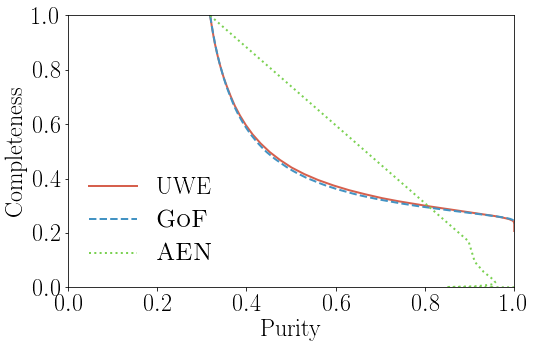

In [15]:
fig, axes = plt.subplots(1,1,figsize=(8,5))

plt.plot(purity['ruwe'], completeness['ruwe'], label='UWE',  linewidth=2, linestyle='-', c=cm.RdBu(0.2))
plt.plot(purity['gof'], completeness['gof'], label=r'\textsc{GoF}',  linewidth=2, linestyle='--', c=cm.RdBu(0.8))
plt.plot(purity['aen'], completeness['aen'], label=r'\textsc{AEN}',  linewidth=2, linestyle=':', c=cm.viridis(0.8))

plt.legend(frameon=False,loc='lower left')#, bbox_to_anchor=(0.,1.))

plt.xlabel('Purity')
plt.ylabel('Completeness')

plt.xlim(0,1); plt.ylim(0,1)

plt.savefig('figs/purity-vs-completeness_cuts.png', bbox_inches='tight', dpi=200, facecolor='w', transparent=False)

In [16]:
purity = {}
completeness = {}

def cleanness(sub1, sub2):
    purity = np.sum((sub1&sub2))/np.sum(sub1)
    completeness = np.sum((sub1&sub2))/np.sum(sub2)
    return purity, completeness

for sample in ['dr2','edr3']:
    dof = fits['astrometric_n_good_obs_al_'+sample] - 5
    fits['astrometric_gof_al_'+sample] = np.sqrt(9*dof/2) * (fits['UWE_'+sample]**(2/3) + 2/(9*dof) - 1)
    
    ruwe_cut = np.linspace(0.,2,300)
    purity['ruwe_'+sample] = []
    completeness['ruwe_'+sample] = []
    for i, ruwe in enumerate(ruwe_cut):
        temp = cleanness(fits['UWE_'+sample]>ruwe, fits['binary'])
        purity['ruwe_'+sample].append(temp[0])
        completeness['ruwe_'+sample].append(temp[1])

    gof_cut = np.linspace(-5.,5,200)
    purity['gof_'+sample] = []
    completeness['gof_'+sample] = []
    for i, gof in enumerate(gof_cut):
        temp = cleanness(np.abs(fits['astrometric_gof_al_'+sample])>gof, fits['binary'])
        purity['gof_'+sample].append(temp[0])
        completeness['gof_'+sample].append(temp[1])

/home/andy/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


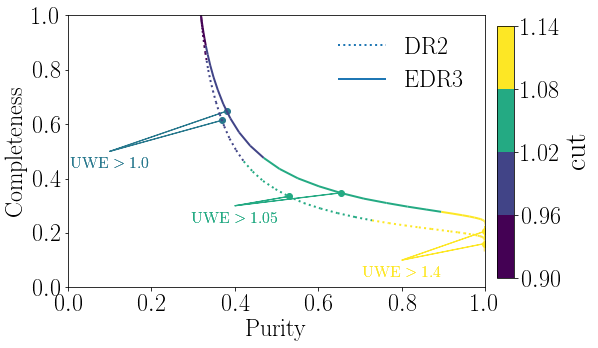

In [26]:
fig, axes = plt.subplots(1,1,figsize=(8,5))

# Use a boundary norm instead
cmap = ListedColormap([cm.viridis(x) for x in np.linspace(0,1.01,6)])
#norm = BoundaryNorm(np.linspace(0.95,1.5,5), cmap.N)
#cmap = ListedColormap([cm.viridis(x) for x in np.linspace(0,1.01,6)])
norm = BoundaryNorm(np.array([0.9,0.96,1.02,1.08,1.14]), cmap.N)


linestyles = {'dr2':':', 'edr3':'-'}
labels = {'dr2':'DR2', 'edr3':'EDR3'}
for sample in ['dr2','edr3']:
    
    points = np.array([purity['ruwe_'+sample], completeness['ruwe_'+sample]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=cmap, norm=norm, linestyle=linestyles[sample], 
                        label=labels[sample])
    lc.set_array(ruwe_cut)
    lc.set_linewidth(2)
    line = axes.add_collection(lc)
    
#     plt.plot(purity['ruwe_'+sample], completeness['ruwe_'+sample],
#              label=labels[sample]+' UWE cut', linestyle=linestyles[sample])

    for i, ruwe in enumerate([1., 1.05, 1.4]):
        temp = cleanness(fits['UWE_'+sample]>ruwe, fits['binary'])
        plt.scatter(temp[0], temp[1], color=cmap((ruwe-0.9)/(1.14-0.9)))
        
        text_loc = [(0.1,0.5), (0.4,0.3), (0.8,0.1)]
        plt.arrow(text_loc[i][0], text_loc[i][1],
                  temp[0]-text_loc[i][0], temp[1]-text_loc[i][1], color=cmap((ruwe-0.9)/(1.14-0.9)))
        plt.text(text_loc[i][0], text_loc[i][1]-0.05, fr'$\mathrm{{UWE}}>{ruwe}$', 
                 ha='center', va='center', fontsize=16, color=cmap((ruwe-0.9)/(1.14-0.9)))
        
plt.xlabel('Purity')
plt.ylabel('Completeness')
plt.xlim(0,1); plt.ylim(0,1)

plt.legend(fontsize=24, frameon=False)
        
# Adding cbar axes to subplots
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])
cbar = fig.colorbar(line, cax=cbar_ax)
cbar.set_label(r'cut', fontsize=30)

plt.savefig('figs/uwe_purity-vs-completeness_dr2-edr3.png', bbox_inches='tight', dpi=200, facecolor='w', transparent=False)

# Astrometry bias

In [31]:
# Crossmatch GUMS data and Gaia-like fits
unique_ids, unique_idx = np.unique(fits['system_id'], return_inverse=True)
intersection = np.intersect1d(unique_ids, gums['system_id'], return_indices=True)

for key in ['ra','dec','parallax','pmra','pmdec']:
    fits[key+'_true'] = gums[key][intersection[2][unique_idx]]

In [32]:
fits['rac_edr3'] = fits['ra_edr3'].copy()
fits['rac_true'] = fits['ra_true'].copy()
fits['rac_error_edr3'] = fits['ra_error_edr3'].copy()/np.cos(fits['dec_edr3'])

0.015463566647402182 -0.0016014014854688185
0.001449009250344304 -0.002061822721730556
0.00018396777761390005 -0.0023619679018705
-0.005852997439224386 -0.0011676843278654908
-0.003302042440567302 -0.0007920149824877481


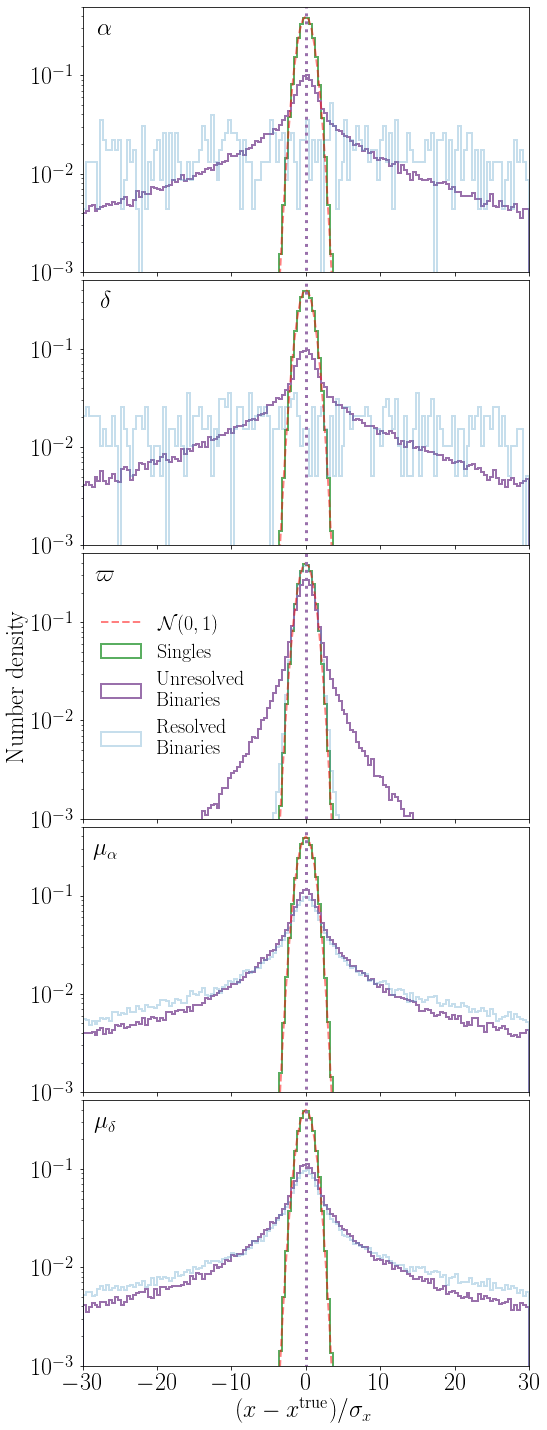

In [34]:
fig, axes = plt.subplots(5,1,figsize=(8,25), sharex=True, sharey=True)

bins = np.arange(-30,30.01,0.4)

ast_params = ['rac','dec','parallax','pmra','pmdec']
ast_labels = [r'\alpha',r'\delta',r'\varpi',r'\mu_{{\alpha}}',r'\mu_\delta']
for i, param in enumerate(ast_params):
    plt.sca(axes[i])
    ax = axes[i]
    if i<2: unit_con = 3600*1000
    else: unit_con = 1
        
    plt.plot(bins, scipy.stats.norm.pdf(bins, 0, 1), '--r', label=r'$\mathcal{N}(0,1)$', alpha=0.5, linewidth=2)
        
    error = unit_con*(fits[param+'_edr3']-fits[param+'_true'])/fits[param+'_error_edr3']
    plt.hist(error[~fits['binary']], bins=bins,
            histtype='step', linewidth=2, density=True, label='Singles',
            color = c_sin)
    plt.hist(error[fits['binary']&(fits['component']==b'unresolved')], bins=bins,
            histtype='step', linewidth=2, density=True, label='Unresolved \nBinaries',
            color = c_bin)
    plt.hist(error[fits['binary']&(fits['component']!=b'unresolved')], bins=bins,
            histtype='step', linewidth=2, density=True, label='Resolved \nBinaries',
            color = cm.RdBu(0.8), alpha=0.3)
#     plt.hist(error[fits['binary']&~(fits['component']==b'unresolved')], bins=bins,
#             histtype='step', linewidth=2, density=True, label='Resolved Binaries',
#             color = cm.RdBu(0.8))
    plt.xlim(bins[0], bins[-1])
    
    if i==2: 
        plt.legend(frameon=False, fontsize=20, loc='center left')
        plt.ylabel('Number density')
    
    median_error = np.nanmedian(error[fits['binary']&(fits['component']==b'unresolved')])
    print(np.nanmedian(error[fits['binary']&(fits['component']==b'unresolved')]), np.nanmedian(error[~fits['binary']]))
    plt.plot([median_error, median_error], [0.,0.5], color = cm.PRGn(0.2), linestyle=':', linewidth=3)
    
    if i==4: plt.xlabel(rf"$(x-x^\mathrm{{true}})/\sigma_x$")
    plt.text(-27,0.3,rf"${ast_labels[i]}$", ha='center', va='center')

plt.yscale('log')
plt.ylim(0.001, 0.5)
    
plt.subplots_adjust(hspace=0.03)
plt.savefig('figs/astrometry_bias.png', bbox_inches='tight', dpi=200, facecolor='w', transparent=False)

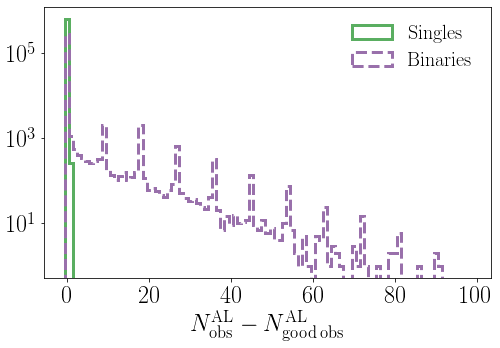

In [35]:
plt.figure(figsize=(8,5));

plt.hist((fits['astrometric_n_obs_al_edr3'] - fits['astrometric_n_good_obs_al_edr3'])[~fits['binary']], 
             bins=np.arange(100)-0.5, histtype='step', color = c_sin, linewidth=3, 
         label='Singles');
plt.hist((fits['astrometric_n_obs_al_edr3'] - fits['astrometric_n_good_obs_al_edr3'])[fits['binary']], 
             bins=np.arange(100)-0.5, histtype='step', color = c_bin, linestyle='--', linewidth=3, 
         label='Binaries');
plt.yscale('log')

plt.legend(fontsize=20, frameon=False)

plt.xlabel(r'$N_\mathrm{obs}^\mathrm{AL} - N_\mathrm{good\,obs}^\mathrm{AL}$')

plt.savefig('figs/downweighted_observations.png', bbox_inches='tight', dpi=200, facecolor='w', transparent=False)

## Result of GCNS-like selection

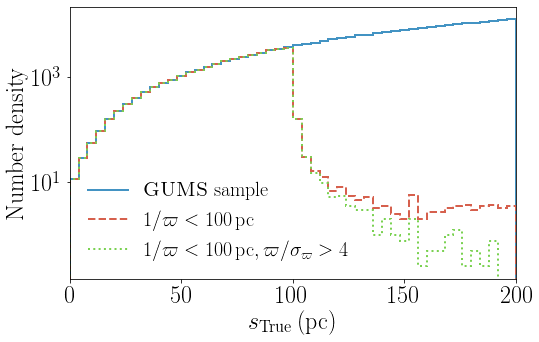

In [36]:
fig, axes = plt.subplots(1,1,figsize=(8,5), sharey=True, sharex=True)

bins = np.arange(0,200.1,4)

plt.sca(axes)
hist, bins = np.histogram(1e3/fits['parallax_true'], bins=bins)
plt.stairs(hist/(bins[1:]-bins[:-1]), bins, linewidth=2, linestyle='-', color=cm.RdBu(0.8),
           label=r'\textsc{GUMS} sample');

hist, bins = np.histogram(1e3/fits['parallax_true'][(1e3/fits['parallax_edr3']<100)], bins=bins)
plt.stairs(hist/(bins[1:]-bins[:-1]), bins, linewidth=2, linestyle='--', color=cm.RdBu(0.2),
           label=r'$1/\varpi < 100\,\mathrm{pc}$');

hist, bins = np.histogram(1e3/fits['parallax_true'][(1e3/fits['parallax_edr3']<100)&(fits['parallax_edr3']/fits['parallax_error_edr3']>4)], bins=bins)
plt.stairs(hist/(bins[1:]-bins[:-1]), bins, linewidth=2, linestyle=':', color=cm.viridis(0.8),
           label=r'$1/\varpi < 100\,\mathrm{pc}, \varpi/\sigma_\varpi>4$');

plt.legend(loc='lower left', frameon=False, fontsize=20)

plt.yscale('log')
plt.xlim(0,200)

plt.ylabel('Number density')
plt.xlabel(r'$s_\mathrm{True}\,(\mathrm{pc})$')

plt.savefig('figs/gcns_selected_sample.png', bbox_inches='tight', dpi=200, facecolor='w', transparent=False)